In [9]:
import numpy as np
import random

# Constants
NUM_ROWS = 20
NUM_COLS = 20
NUM_SEATS = NUM_ROWS * NUM_COLS

# UV Codes
RO05 = 1
SY01 = 2
MT21 = 3
GE27 = 4

# Number of students in each UV
students = {
    RO05: 50,
    SY01: 100,
    MT21: 150,
    GE27: 100
}

# Initialize classroom grid
classroom = np.zeros((NUM_ROWS, NUM_COLS), dtype=int)

# Function to place students randomly
def place_students_randomly():
    available_seats = [(i, j) for i in range(NUM_ROWS) for j in range(NUM_COLS)]
    for uv, count in students.items():
        for _ in range(count):
            seat = random.choice(available_seats)
            classroom[seat] = uv
            available_seats.remove(seat)

place_students_randomly()


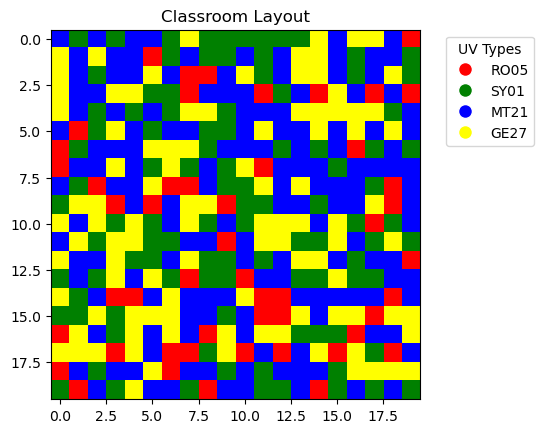

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



uv_colors = {
    'RO05': "red",
    'SY01': "green",
    'MT21': "blue",
    'GE27': "yellow"
}

def visualize_classroom(classroom, title="Classroom Layout"):
    fig, ax = plt.subplots()
    cmap = mcolors.ListedColormap(['white', 'red', 'green', 'blue', 'yellow'])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    ax.imshow(classroom, cmap=cmap, norm=norm)
    ax.set_title(title)
    
    # Indicator of uvs
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=uv, markersize=10, markerfacecolor=color)
                        for uv, color in uv_colors.items()]
    ax.legend(handles=legend_elements, title="UV Types", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
# def visualize_classroom(classroom, title="Classroom Layout"):
#     response = input(f"Displaying {title}. Press Enter to continue or type 'exit' to stop: ")
#     if response.lower() == 'exit':
#         return False

#     fig, ax = plt.subplots()
#     cmap = mcolors.ListedColormap(['white', 'red', 'green', 'blue', 'yellow'])
#     bounds = [0, 1, 2, 3, 4, 5]
#     norm = mcolors.BoundaryNorm(bounds, cmap.N)

#     ax.imshow(classroom, cmap=cmap, norm=norm)
#     ax.set_title(title)
#     plt.show()
#     return True


    
visualize_classroom(classroom)

In [17]:
def calculate_energy_voisin(classroom):
    energy = 0
    rows, cols = classroom.shape
    for i in range(rows):
        for j in range(cols):
            # Current seat's UV
            uv = classroom[i, j]
            # Check neighbors
            if i > 0 and classroom[i-1, j] == uv:
                energy += 1
            else:
                energy += 0
            if i < rows - 1 and classroom[i+1, j] == uv:
                energy += 1
            else:
                energy += 0
            if j > 0 and classroom[i, j-1] == uv:
                energy += 1
            else:
                energy += 0
            if j < cols - 1 and classroom[i, j+1] == uv:
                energy += 1
            else:
                energy += 0
    return energy



def calculate_energy_stratification(classroom):
    energy = 0
    rows, cols = classroom.shape
    for i in range(rows):
        for j in range(cols):
            # Current seat's UV
            uv = classroom[i, j]
            # Check neighbors
            if i > 0 and classroom[i-1, j] == uv:
                energy += 0
            else:
                energy += 1
            if i < rows - 1 and classroom[i+1, j] == uv:
                energy += 0
            else:
                energy += 1
            if j > 0 and classroom[i, j-1] == uv:
                energy += 0
            else:
                energy += 1
            if j < cols - 1 and classroom[i, j+1] == uv:
                energy += 0
            else:
                energy += 1
    return energy


In [18]:
def metropolis_step(classroom, temperature=1.0):
    rows, cols = classroom.shape
    i1, j1 = random.randint(0, rows-1), random.randint(0, cols-1)
    i2, j2 = random.randint(0, rows-1), random.randint(0, cols-1)

    # Ensure we have two different seats
    while (i1, j1) == (i2, j2):
        i2, j2 = random.randint(0, rows-1), random.randint(0, cols-1)

    # Swap students
    classroom[i1, j1], classroom[i2, j2] = classroom[i2, j2], classroom[i1, j1]
    
    # Calculate energy change
    new_energy = calculate_energy_stratification(classroom)
    delta_energy = new_energy - current_energy

    # Decide whether to accept the new configuration
    if delta_energy <= 0 or random.random() < np.exp(-delta_energy / temperature):
        return new_energy  # Accept new configuration
    else:
        # Revert swap
        classroom[i1, j1], classroom[i2, j2] = classroom[i2, j2], classroom[i1, j1]
        return current_energy  # Keep old configuration


In [19]:
from IPython.display import clear_output

def run_metropolis_algorithm(classroom, iterations=10000000, temperature=1.0, visualize_every=100):
    global current_energy
    current_energy = calculate_energy_stratification(classroom)
    energies = []
    visualize_classroom(classroom, "Initial Configuration")
    
    for i in range(iterations):
        current_energy = metropolis_step(classroom, temperature)
        energies = np.append(energies, current_energy)
        if i % visualize_every == 0 and i != 0:
            clear_output(wait=True)
            visualize_classroom(classroom, f"Configuration at iteration {i}")
    
    clear_output(wait=True)
    visualize_classroom(classroom, "Final Configuration")
    return energies

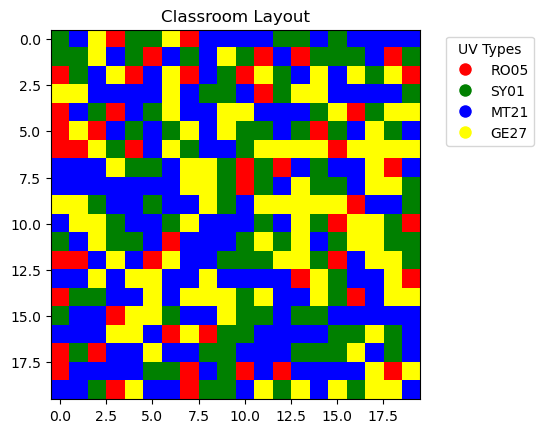

In [20]:
#Initialiser la situation de la salle
place_students_randomly()

visualize_classroom(classroom)

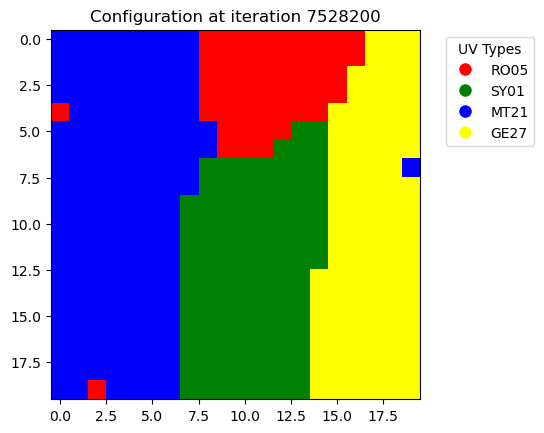

In [ ]:
# Run the algorithm
energies = run_metropolis_algorithm(classroom)

 Energie minimale 200.0


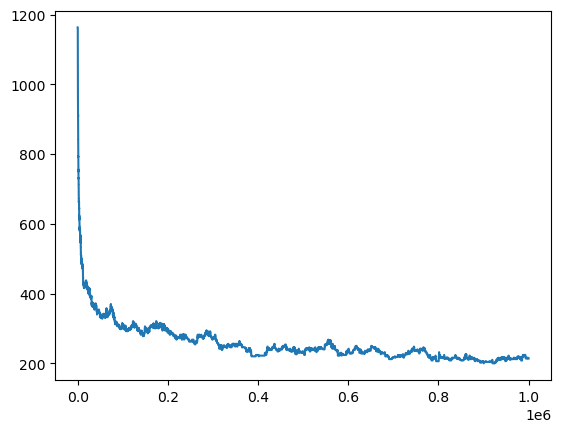

In [16]:
import matplotlib.pyplot as plt

plt.plot(energies)
print(f" Energie minimale {np.min(energies)}")